Загружаем необходимые библиотеки

In [1]:
from numpy import savetxt, loadtxt

In [2]:
import numpy as np

In [3]:
import joblib

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline

In [5]:
from sklearn import decomposition

Загружаем обучающие данные и создаем из них дамп

In [6]:
dataset = loadtxt(open('train.csv', 'r'), dtype='f8', delimiter=',', skiprows=1)
joblib.dump(dataset, 'training_set.pkl')
dataset = joblib.load('training_set.pkl')

Загружаем тестовые данные и создаем из них дамп

In [7]:
test = loadtxt(open('test.csv', 'r'), dtype='f8', delimiter=',', skiprows=1)
joblib.dump(test, 'test_set.pkl')
test = joblib.load('test_set.pkl')

In [8]:
target = [x[0] for x in dataset]
train = [x[1:] for x in dataset]

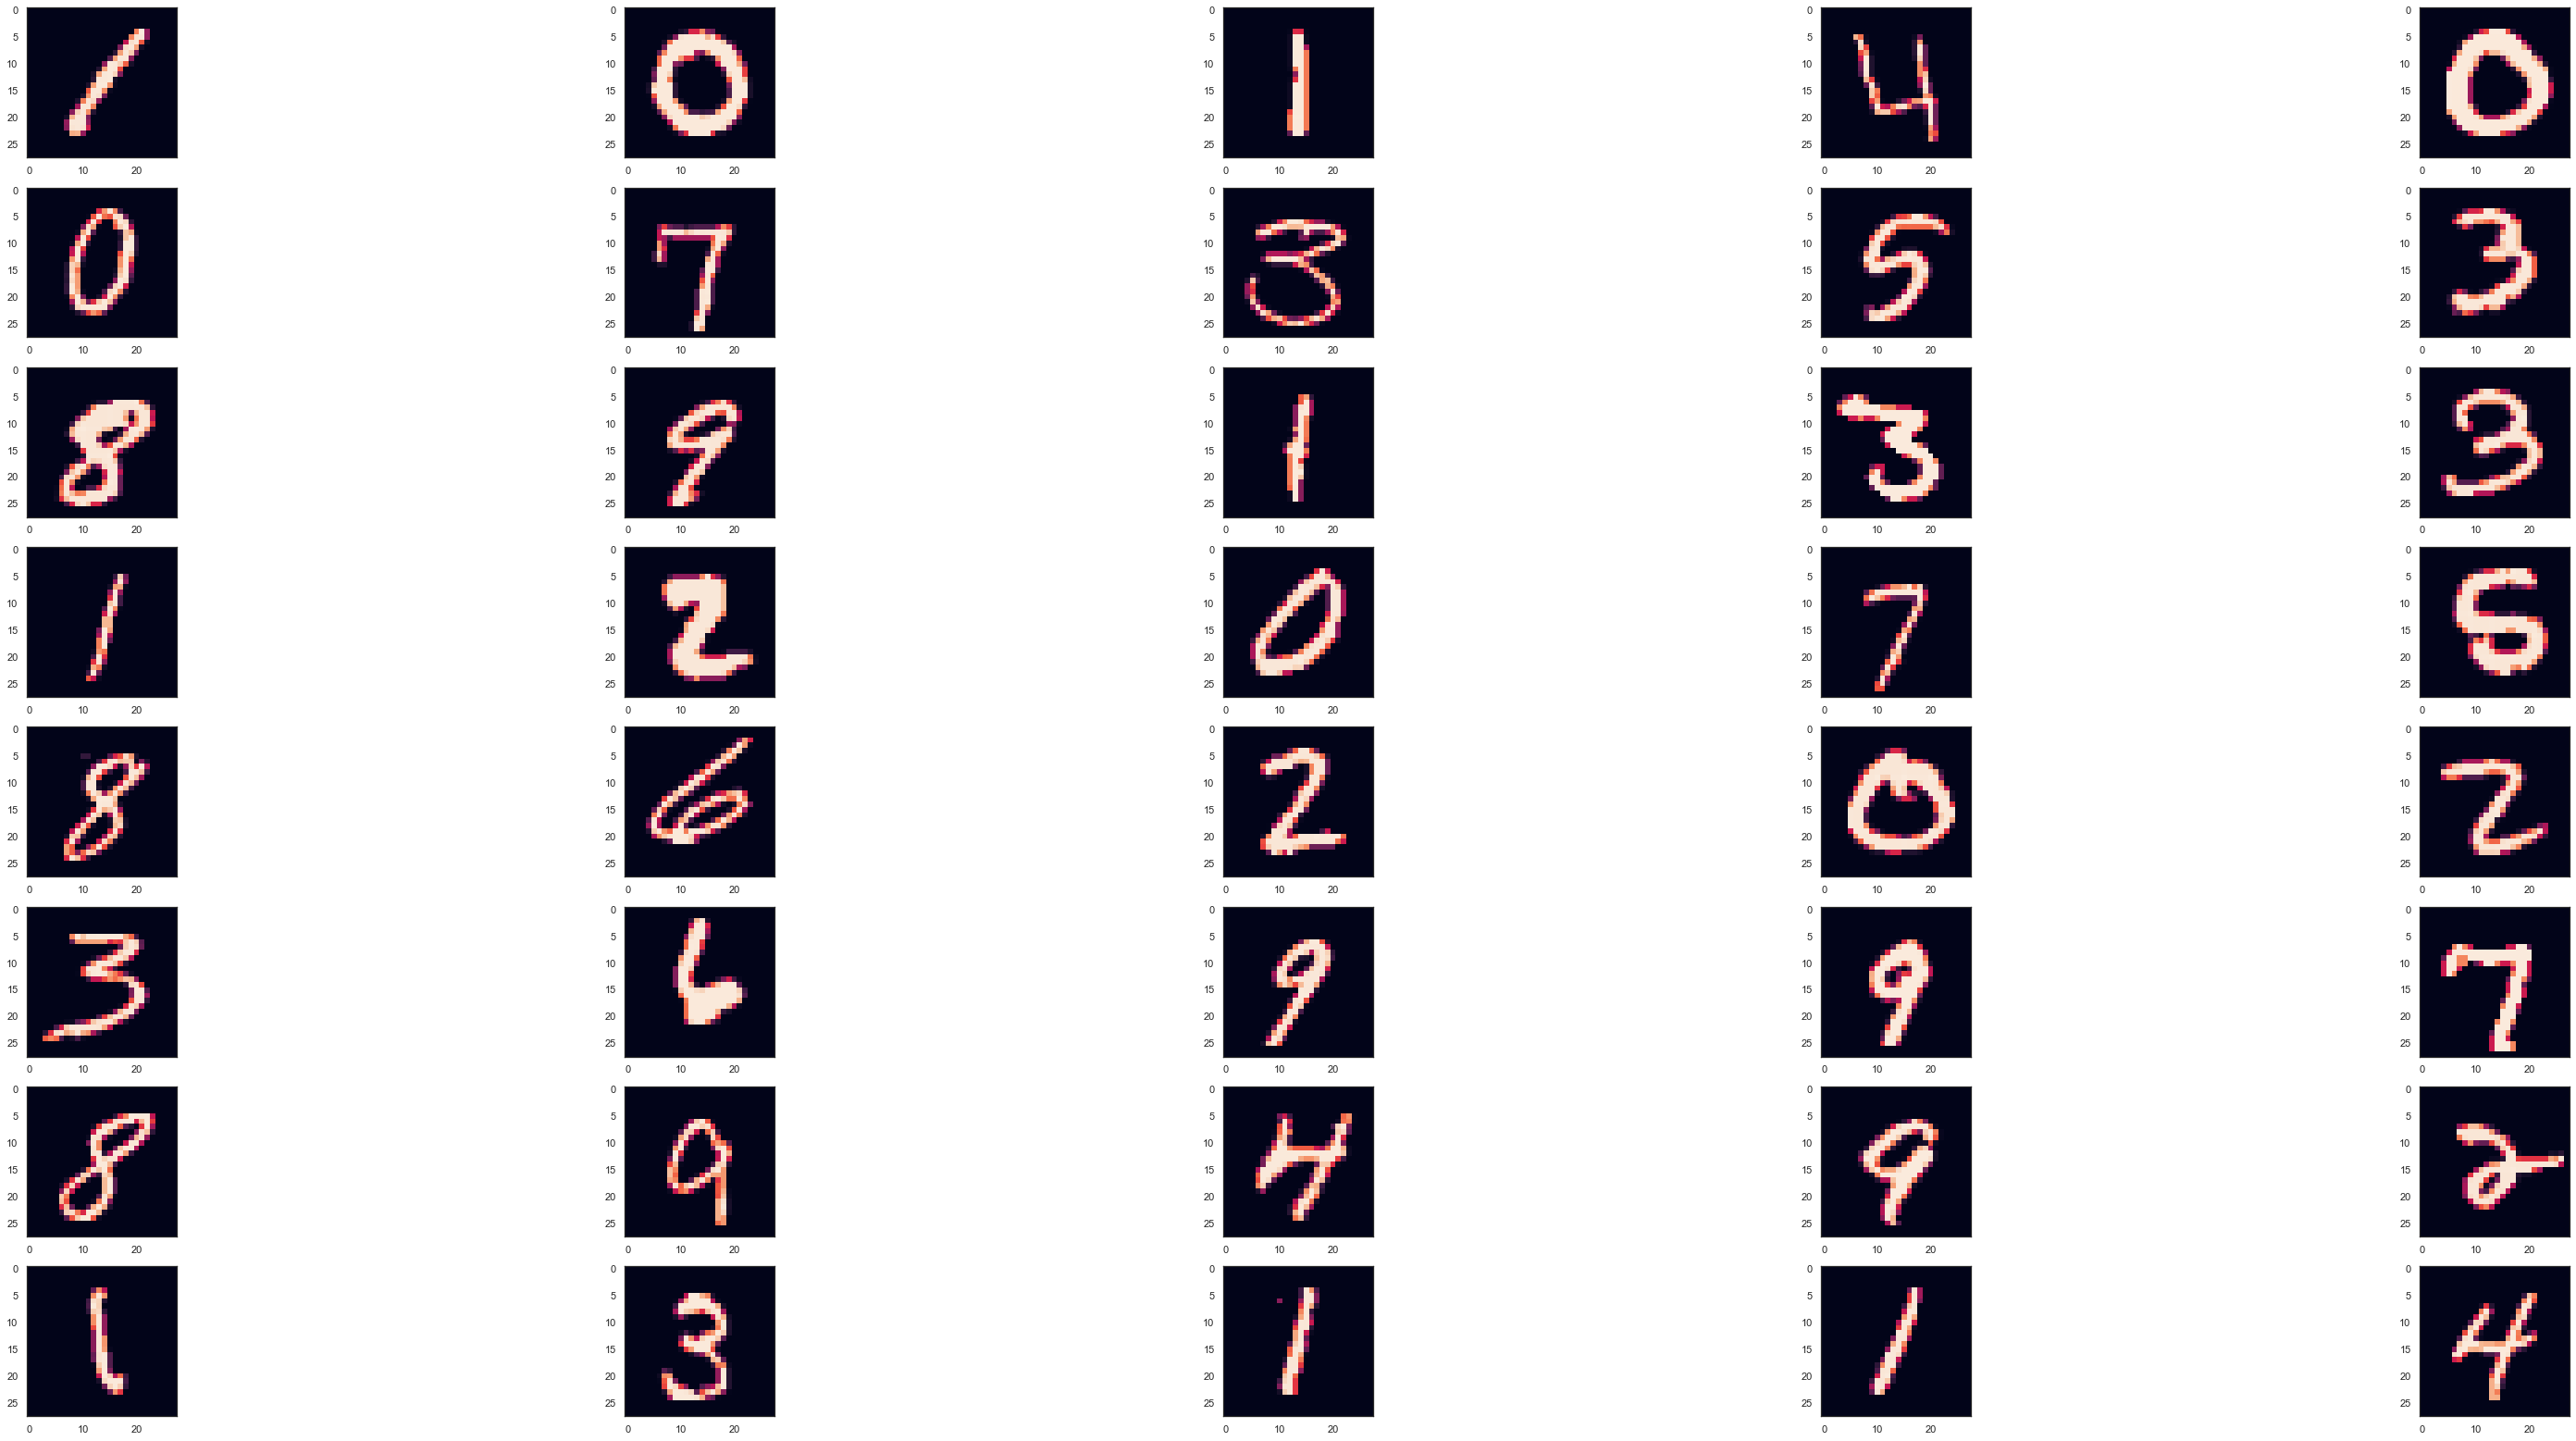

In [9]:
plt.figure(figsize=(56, 28))
for i in range(40):
    plt.subplot(8, 5, i + 1)
    plt.imshow(train[i].reshape([28,28]))


Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

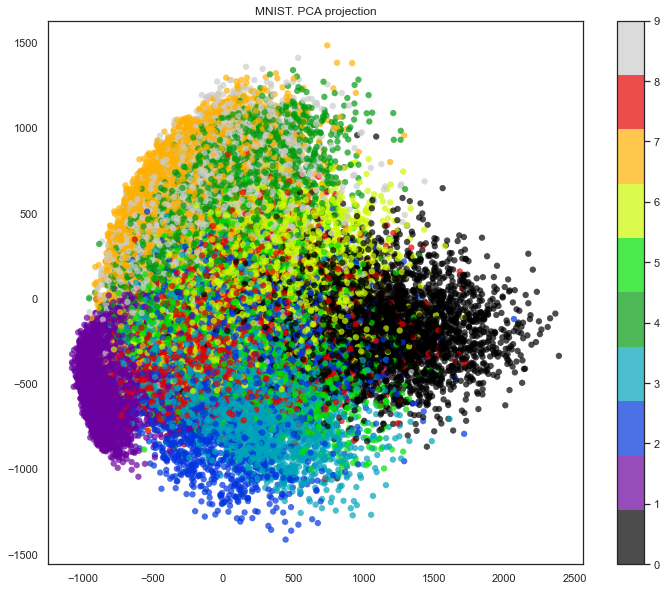

In [10]:
pca = decomposition.PCA(n_components=2)
train_reduced = pca.fit_transform(train)

print('Projecting %d-dimensional data to 2D' % train[1].shape)

plt.figure(figsize=(12,10))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=target, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

Wall time: 14min 56s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

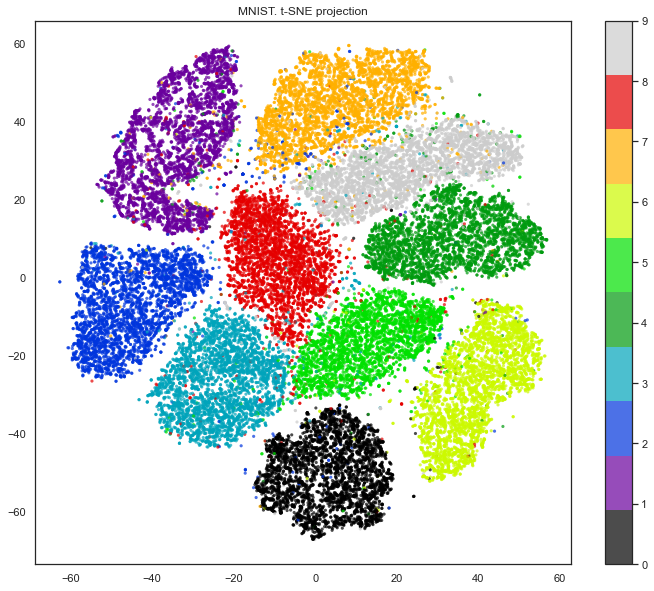

In [10]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

train_tsne = tsne.fit_transform(train)

plt.figure(figsize=(12,10))
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=target, 
            edgecolor='none', alpha=0.7, s=10,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

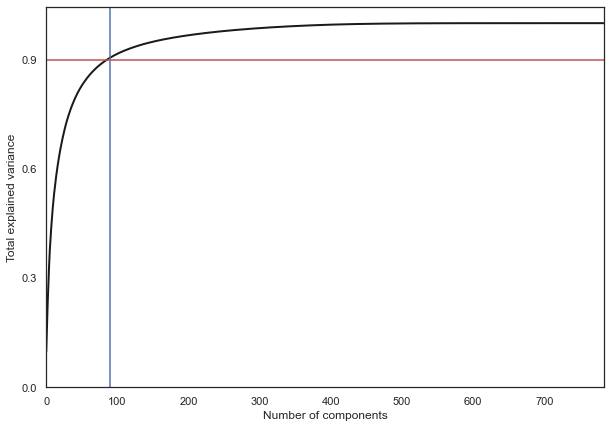

In [14]:
pca = decomposition.PCA().fit(train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 784)
plt.yticks(np.arange(0, 1.1, 0.3))
plt.axvline(90, c='b')
plt.axhline(0.9, c='r')
plt.show();